<a href="https://colab.research.google.com/github/roguefreaks/BigInteger/blob/main/Deep_learning_based_medical_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
!cp -r '/content/gdrive/My Drive/dataset' '/content/'


In [3]:
import os
import zipfile

# Define the path to the zip file
zip_file_path = "/content/dataset/archive (1).zip"

# Define the destination folder where you want to extract the contents
extracted_folder_path = "/content/dataset/extracted"

# Create the destination folder if it doesn't exist
if not os.path.exists(extracted_folder_path):
    os.makedirs(extracted_folder_path)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# Print a message indicating that the extraction is complete
print("Extraction complete.")


Extraction complete.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [5]:
# count the number of images in the respective classes 0 - Brain Tumur and 1- Healthy
ROOT_DIR="/content/dataset/extracted/Brain Tumor Data Set/Brain Tumor Data Set"
number_of_images={}
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))

In [6]:
number_of_images.items()

dict_items([('Brain Tumor', 2513), ('Healthy', 2087)])

In [7]:
dirs = os.listdir("/content/dataset/extracted/Brain Tumor Data Set/Brain Tumor Data Set")
sorted_dirs = sorted(dirs)
print(sorted_dirs)


['Brain Tumor', 'Healthy']


# WE WILL SPLIT THE DATA SUCH THAT
* 70% FOR TRAIN DATA
* 15% FOR VALIDATION
* 15% FOR TESTING

In [8]:
# Define the training folder path
TRAINING_FOLDER = "./training_v2"

# Create the training folder if it doesn't exist
if not os.path.exists(TRAINING_FOLDER):
    os.mkdir(TRAINING_FOLDER)
    print(f"New folder created: {TRAINING_FOLDER}")
else:
    print(f"{TRAINING_FOLDER} folder exists")

# Iterate over each class
for dir in os.listdir(ROOT_DIR):
    class_folder = os.path.join(TRAINING_FOLDER, dir)

    # Create the class folder if it doesn't exist
    if not os.path.exists(class_folder):
        os.makedirs(class_folder)
        print(f"New folder created: {class_folder}")

    # Randomly select images for the class
    images_to_copy = np.random.choice(
        a=os.listdir(os.path.join(ROOT_DIR, dir)),
        size=(math.floor(0.7 * number_of_images[dir]) - 5),
        replace=False
    )

    # Copy selected images to the training folder
    for img in images_to_copy:
        source_path = os.path.join(ROOT_DIR, dir, img)
        destination_path = os.path.join(class_folder, img)
        shutil.copy(source_path, destination_path)
        print(f"Copied: {img} to {class_folder}")

print("Image copying completed.")


New folder created: ./training_v2
New folder created: ./training_v2/Brain Tumor
Copied: Cancer (547).jpg to ./training_v2/Brain Tumor
Copied: Cancer (1061).jpg to ./training_v2/Brain Tumor
Copied: Cancer (1413).jpg to ./training_v2/Brain Tumor
Copied: Cancer (420).jpg to ./training_v2/Brain Tumor
Copied: Cancer (215).jpg to ./training_v2/Brain Tumor
Copied: Cancer (2147).jpg to ./training_v2/Brain Tumor
Copied: Cancer (1290).jpg to ./training_v2/Brain Tumor
Copied: Cancer (1473).jpg to ./training_v2/Brain Tumor
Copied: Cancer (225).jpg to ./training_v2/Brain Tumor
Copied: Cancer (1384).jpg to ./training_v2/Brain Tumor
Copied: Cancer (106).jpg to ./training_v2/Brain Tumor
Copied: Cancer (1446).jpg to ./training_v2/Brain Tumor
Copied: Cancer (1440).jpg to ./training_v2/Brain Tumor
Copied: Cancer (1126).jpg to ./training_v2/Brain Tumor
Copied: Cancer (2404).jpg to ./training_v2/Brain Tumor
Copied: Cancer (472).jpg to ./training_v2/Brain Tumor
Copied: Cancer (2009).jpg to ./training_v2/Bra

In [15]:
def datafolder(pt, split):
    if not os.path.exists("./"+pt):
        os.mkdir("./"+pt)

        for dir in os.listdir(ROOT_DIR):
            os.makedirs("./"+pt+"/"+dir)

            # Debugging prints
            print(f"Class: {dir}, Total Images: {number_of_images[dir]}")

            images_to_copy = np.random.choice(
                a=os.listdir(os.path.join(ROOT_DIR, dir)),
                size=(math.floor(split*number_of_images[dir])-5),
                replace=False
            )

            # Debugging prints
            print(f"Images to Copy for {dir}: {len(images_to_copy)}")

            for img in images_to_copy:
                O = os.path.join(ROOT_DIR, dir, img)
                D = os.path.join("./"+pt, dir, img)
                shutil.copy(O, D)
                os.remove(O)
    else:
        print(f"{pt} folder exists")


In [10]:
datafolder("training_v2",0.7)

training_v2 folder exists


In [13]:
datafolder("val",0.15)

val folder exists


In [16]:
datafolder("test",0.15)

test folder exists


In [17]:
number_of_images={}
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))

number_of_images.items()

dict_items([('Brain Tumor', 1771), ('Healthy', 1471)])

# Model Build

In [18]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout,Dense, BatchNormalization, GlobalAveragePooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras


In [19]:
# CNN Model

model=Sequential()

model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))

model.add(Conv2D(filters=36,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 36)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [20]:
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

# Prepairing our data using Data Generator

In [21]:
def preprocessingImages1(path):
  """
  input : Path
  output : Pre processed images
  """
  image_data=ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1/255,horizontal_flip=True)
  image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')

  return image

In [22]:
path="/content/training_v2"
train_data=preprocessingImages1(path)

Found 3209 images belonging to 2 classes.


In [23]:
def preprocessingImages2(path):
  """
  input : Path
  output : Pre processed images
  """
  image_data=ImageDataGenerator(rescale=1/255)
  image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')

  return image

In [24]:
path="/content/test"
test_data=preprocessingImages2(path)

Found 679 images belonging to 2 classes.


In [25]:
path="/content/val"
val_data=preprocessingImages2(path)

Found 679 images belonging to 2 classes.


In [26]:
# Early stopping and model check point

from keras.callbacks import ModelCheckpoint,EarlyStopping

# early stopping

es=EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=5,verbose=1,mode='auto')

# model check point
mc=ModelCheckpoint(monitor="val_accuracy",filepath="./bestmodel.h5",verbose=1,save_best_only=True,mode='auto')

cd=[es,mc]

# Model Training

In [27]:
hs=model.fit_generator(generator=train_data,
                       steps_per_epoch=8,
                       epochs=30,
                       verbose=1,validation_data=val_data,
                       validation_steps=16,
                       callbacks=cd)

<ipython-input-27-703aefd05403>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hs=model.fit_generator(generator=train_data,


Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.6984 - accuracy: 0.5408
Epoch 1: val_accuracy improved from -inf to 0.61914, saving model to ./bestmodel.h5
8/8 [==============================] - 20s 797ms/step - loss: 0.6984 - accuracy: 0.5408 - val_loss: 0.6628 - val_accuracy: 0.6191


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.6777 - accuracy: 0.5781
Epoch 2: val_accuracy did not improve from 0.61914
8/8 [==============================] - 5s 663ms/step - loss: 0.6777 - accuracy: 0.5781 - val_loss: 0.6607 - val_accuracy: 0.5430
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.6609 - accuracy: 0.6250
Epoch 3: val_accuracy improved from 0.61914 to 0.70508, saving model to ./bestmodel.h5
8/8 [==============================] - 5s 615ms/step - loss: 0.6609 - accuracy: 0.6250 - val_loss: 0.5948 - val_accuracy: 0.7051
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.6450 - accuracy: 0.6562
Epoch 4: val_accuracy improved from 0.70508 to 0.70703, saving model to ./bestmodel.h5
8/8 [==============================] - 10s 1s/step - loss: 0.6450 - accuracy: 0.6562 - val_loss: 0.5728 - val_accuracy: 0.7070
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 0.6206 - accuracy: 0.6953
Epoch 5: val_accuracy 

In [28]:
# Model Graphical interpretation


h=hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

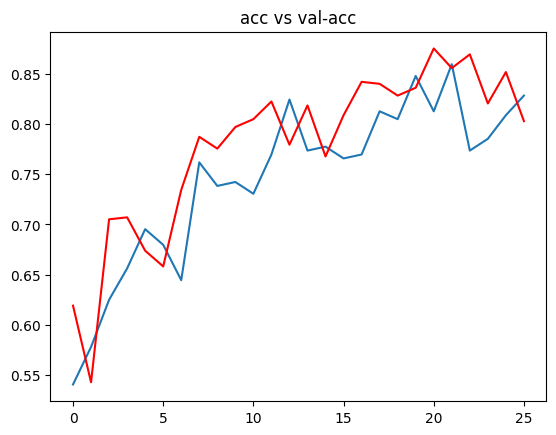

In [29]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c='red')

plt.title("acc vs val-acc")
plt.show()

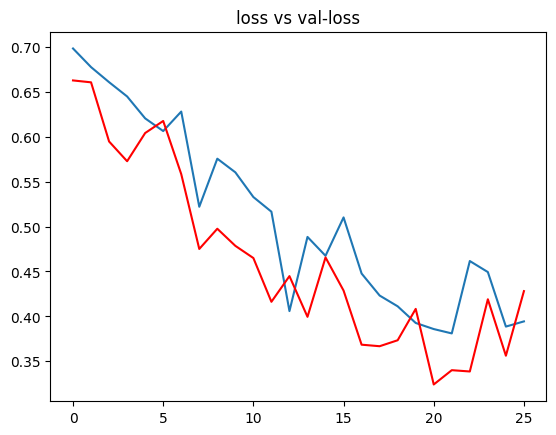

In [30]:
import matplotlib.pyplot as plt

plt.plot(h['loss'])
plt.plot(h['val_loss'],c='red')

plt.title("loss vs val-loss")
plt.show()

In [31]:
# Model Accuracy
from keras.models import load_model

model=load_model("/content/bestmodel.h5")

# Model Accuracy

In [32]:
acc=model.evaluate_generator(test_data)[1]

print(f"the accuracy of the our model is {acc*100} %")

<ipython-input-32-e68915861acd>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc=model.evaluate_generator(test_data)[1]


the accuracy of the our model is 85.71428656578064 %


In [33]:
from keras.preprocessing.image import load_img,img_to_array

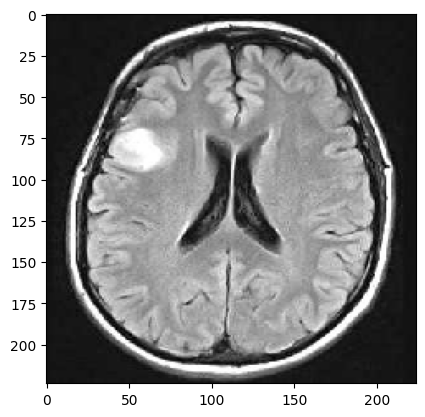

1/1 [==============================] - 0s 25ms/step
The MRI is predicted to have a tumor.


In [36]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

path = "/content/dataset/extracted/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1261).jpg"

img = load_img(path, target_size=(224, 224))
input_arr = img_to_array(img) / 255

plt.imshow(input_arr)
plt.show()

input_arr = np.expand_dims(input_arr, axis=0)
pred_probabilities = model.predict(input_arr)[0][0]

threshold = 0.5
if pred_probabilities >= threshold:
    print("The MRI is predicted to have a tumor.")
else:
    print("The MRI is predicted not to have a tumor.")


In [132]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthy': 1}